See the BlockSci documentation at https://github.com/citp/BlockSci for more info

# BlockSci Setup

In [1]:
import blocksci
import matplotlib.pyplot as plt
import matplotlib.ticker
import collections
import pandas as pd
import numpy as np

%matplotlib notebook

In [2]:
# parser_data_directory should be set to the data-directory which the blocksci_parser output
chain = blocksci.Blockchain("/home/ubuntu/bitcoin")

In [3]:
# Validation: pick a sample transaction to review
# compare https://blockchain.info/tx/39dd22ce27bd470b99d8dcf087eb488be9461cda4efc70d7cd9883283f511c89 
tx1 = chain.tx_with_hash('39dd22ce27bd470b99d8dcf087eb488be9461cda4efc70d7cd9883283f511c89')

In [8]:
# form data frames for the input and output addresses and values involved in the transaction
input_list = [t.address_string for t in tx1.inputs.address]
input_val = tx1.inputs.value
adlist_in = [(a,b) for a, b in zip(input_list,input_val)]

df = pd.DataFrame(adlist_in, columns=["address", "value"])
df_in = df.groupby(["address"]).sum()/100000000
df_in = df_in.rename_axis('Inputs', axis=1)

output_list = [t.address_string for t in tx1.outputs.address]
output_val = tx1.outputs.value
adlist_out = [(a,b) for a, b in zip(output_list,output_val)]

df = pd.DataFrame(adlist_out, columns=["address", "value"])
df_out = df.groupby(["address"]).sum()/100000000
df_out = df_out.rename_axis('Outputs', axis=1)

In [9]:
#take a look
display(df_in)
display(df_out)

Inputs,value
address,
34Cq8zSi9R6BZSR6rPSvDP4fvZBvw1CspY,9.881169
37dSd1XGNyWs5CbNQvPcynhNABncwA4iMM,8.752133
38E8Mhj7emLst3bUhM1qJnc3prZfTLvf29,9.897222
39WHwyqAJL7LDNm8253Vaya7uW7fRGZj2e,9.181995
3EhLZarJUNSfV6TWMZY1Nh5mi3FMsdHa5U,320.371575
3NZwE5jgXybZjWF6NZ7eVmiZS9ZNCe1PA9,8.624757


Outputs,value
address,
37rub7cQSufSBHzpCkxDcQLXTBYcLr3pss,1.688812
3EKc1EHHRVJrwBGFgvxd7ZJrKxjTHZZFhV,365.000000


# Obligatory visualization

In [10]:
%time net_coins_per_block = chain.map_blocks(lambda block: block.net_address_type_value(), start=0, end=510000)
#%time net_coins_per_block = chain.map_blocks(lambda block: block.net_address_type_value())

CPU times: user 11.5 s, sys: 628 ms, total: 12.1 s
Wall time: 21.2 s


(0, 13313558.289755534)

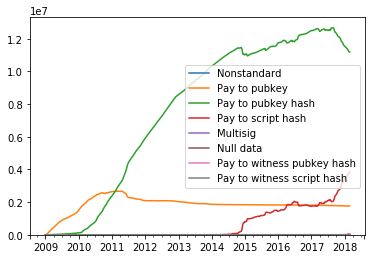

In [11]:
df = pd.DataFrame(net_coins_per_block).fillna(0).cumsum()/1e8
df = chain.heights_to_dates(df)
df = df.rename(columns={t:str(t) for t in df.columns})
ax = df.resample("W").mean().plot()
ax.set_ylim(ymin=0)